# Neural Networks
This notebook uses Artificial Neural Networks (ANNs) for classification purposes. Alternatively known as Multi-Layer Perceptron (MLP).

In [1]:
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_predict
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cleanData = pd.read_csv("CleanData.csv")
chosenColumns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']
cleanData = cleanData[chosenColumns]

In [3]:
# Define x and y (binary) variables for classification:

X = cleanData.drop(['Walc','Dalc'], axis=1).as_matrix()

Dalc = cleanData['Dalc'].as_matrix()
yD = Dalc > 3                             #"high" alcohol consumption = true
Walc = cleanData['Walc'].as_matrix()
yW = Walc > 3                             #"high" alcohol consumption = true

In [4]:
# Weekday drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresD = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredD = cross_val_predict(model, X, yD, cv=2)
    scoresD.append(metrics.accuracy_score(y_true=yD, y_pred=yPredD))
    print("Num Nodes =", nn, " || Accuracy =", scoresD[-1])

Num Nodes = 25  || Accuracy = 0.940443213296
Num Nodes = 50  || Accuracy = 0.883656509695
Num Nodes = 75  || Accuracy = 0.905817174515
Num Nodes = 100  || Accuracy = 0.945983379501
Num Nodes = 125  || Accuracy = 0.948753462604
Num Nodes = 150  || Accuracy = 0.948753462604
Num Nodes = 175  || Accuracy = 0.937673130194
Num Nodes = 200  || Accuracy = 0.948753462604


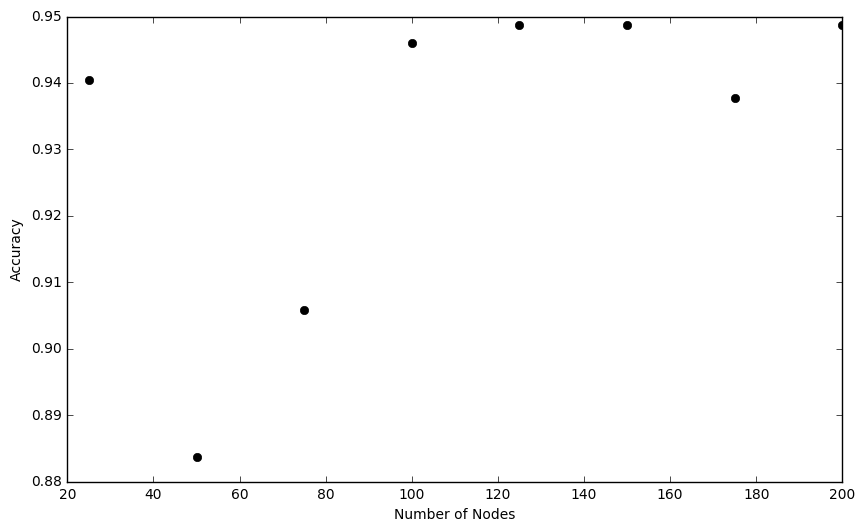

In [5]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(numNodes, scoresD, 'ko')

Due to neural networks random initialization, this plot will look different every time. After running it several times, we noticed that 125 nodes consistently produces good results.

In [6]:
# Weekend Drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresW = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredW = cross_val_predict(model, X, yW, cv=2)
    scoresW.append(metrics.accuracy_score(y_true=yD, y_pred=yPredW))
    print("Num Nodes =", nn, " || Accuracy =", scoresW[-1])

Num Nodes = 25  || Accuracy = 0.753462603878
Num Nodes = 50  || Accuracy = 0.94459833795
Num Nodes = 75  || Accuracy = 0.921052631579
Num Nodes = 100  || Accuracy = 0.940443213296
Num Nodes = 125  || Accuracy = 0.948753462604
Num Nodes = 150  || Accuracy = 0.948753462604
Num Nodes = 175  || Accuracy = 0.943213296399
Num Nodes = 200  || Accuracy = 0.940443213296


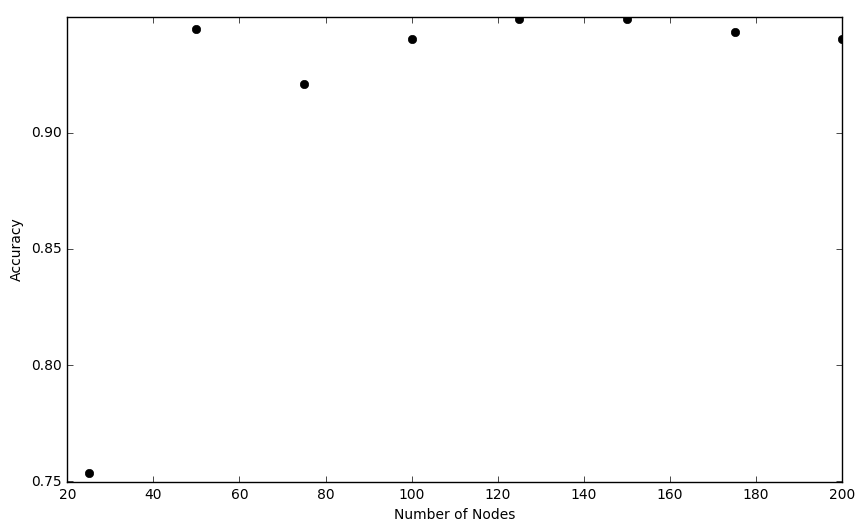

In [7]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(numNodes, scoresW, 'ko')

125 Nodes still does ok. Let's stick with that.

In [8]:
nn = 125
modelD = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
modelW = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
yPredD = cross_val_predict(modelD, X, yD, cv=2)
yPredW = cross_val_predict(modelW, X, yW, cv=2)

print("Weekday Confusion Matrix")
print(metrics.confusion_matrix(y_true = yD, y_pred = yPredD))
print(metrics.accuracy_score(y_true = yD, y_pred = yPredD))
print()

print("Weekend Confusion Matrix")
print(metrics.confusion_matrix(y_true = yW, y_pred = yPredW))
print(metrics.accuracy_score(y_true = yW, y_pred = yPredW))

Weekday Confusion Matrix
[[342 343]
 [ 18  19]]
0.5

Weekend Confusion Matrix
[[569   1]
 [151   1]]
0.789473684211
